# Morphological Image Processing

## Lab - 09

## Develop By: Dr. Irfan

In [1]:
import numpy as np
from scipy import signal, misc, ndimage
from skimage import filters, feature, img_as_float
from skimage.io import imread
from skimage.color import rgb2gray
from PIL import Image, ImageFilter, ImageEnhance
import matplotlib.pylab as pylab

def plot_image(image, title=''):
    pylab.title(title, size=20), pylab.imshow(image)
    pylab.axis('off') # comment this line if you want axis ticks


-----------
# 01 - Erosion
-------------

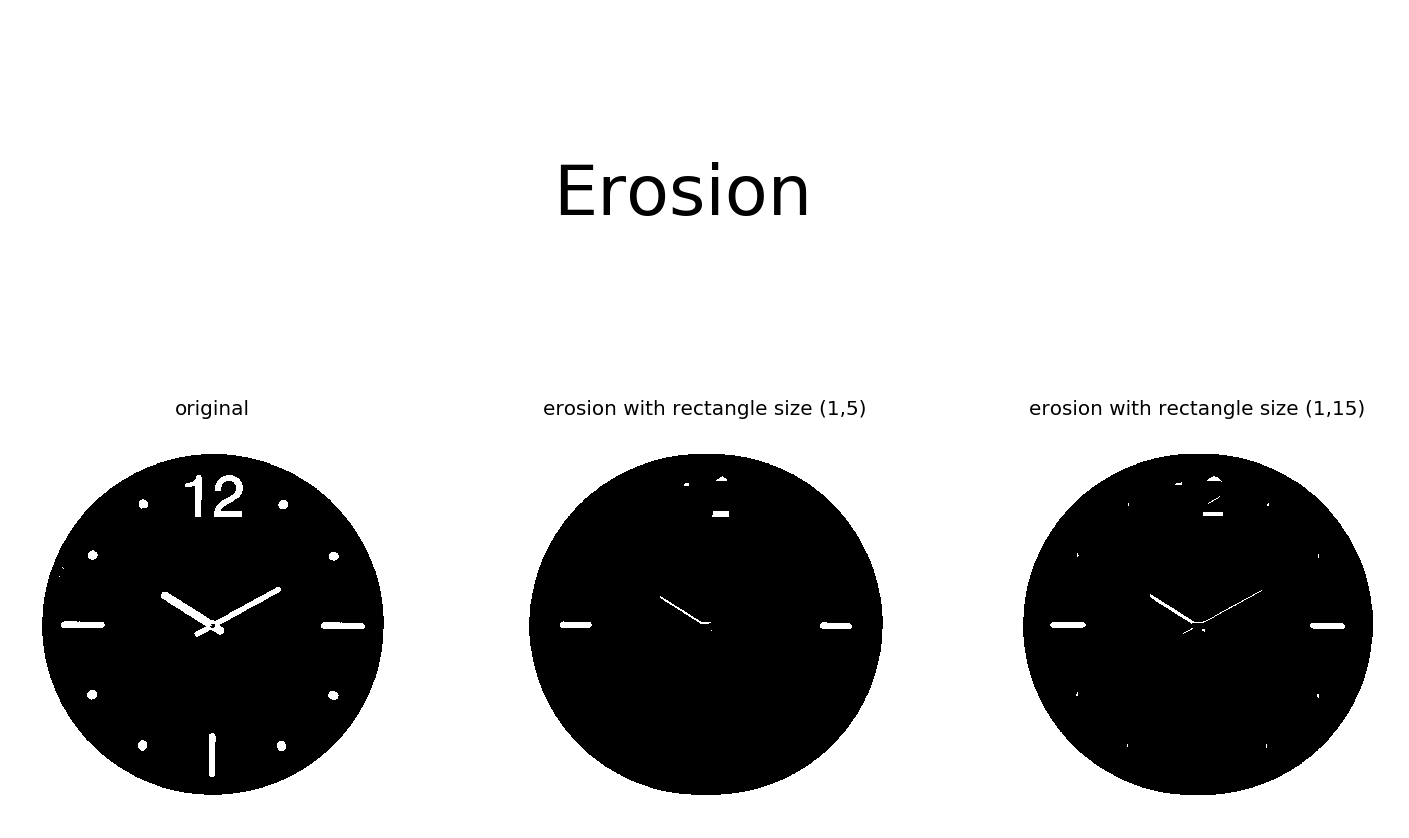

In [5]:
from skimage.morphology import binary_erosion, rectangle

im = rgb2gray(imread('images/clock.jpg'))
imBW = im
imBW[im <= 0.5] = 0 # create binary image with fixed threshold 0.5
imBW[im > 0.5] = 1

pylab.figure(figsize=(25,18))
pylab.gray()
pylab.subplot(131), plot_image(im, 'original') 

im1 = binary_erosion(imBW, rectangle(1,35))
pylab.subplot(132), plot_image(im1, 'erosion with rectangle size (1,5)') 

im1 = binary_erosion(imBW, rectangle(3,25))
pylab.subplot(133), plot_image(im1, 'erosion with rectangle size (1,15)') 
pylab.suptitle("\n\nErosion", size = 70)
pylab.show()

------
# 2 - Dilation
--------

<Figure size 432x288 with 0 Axes>

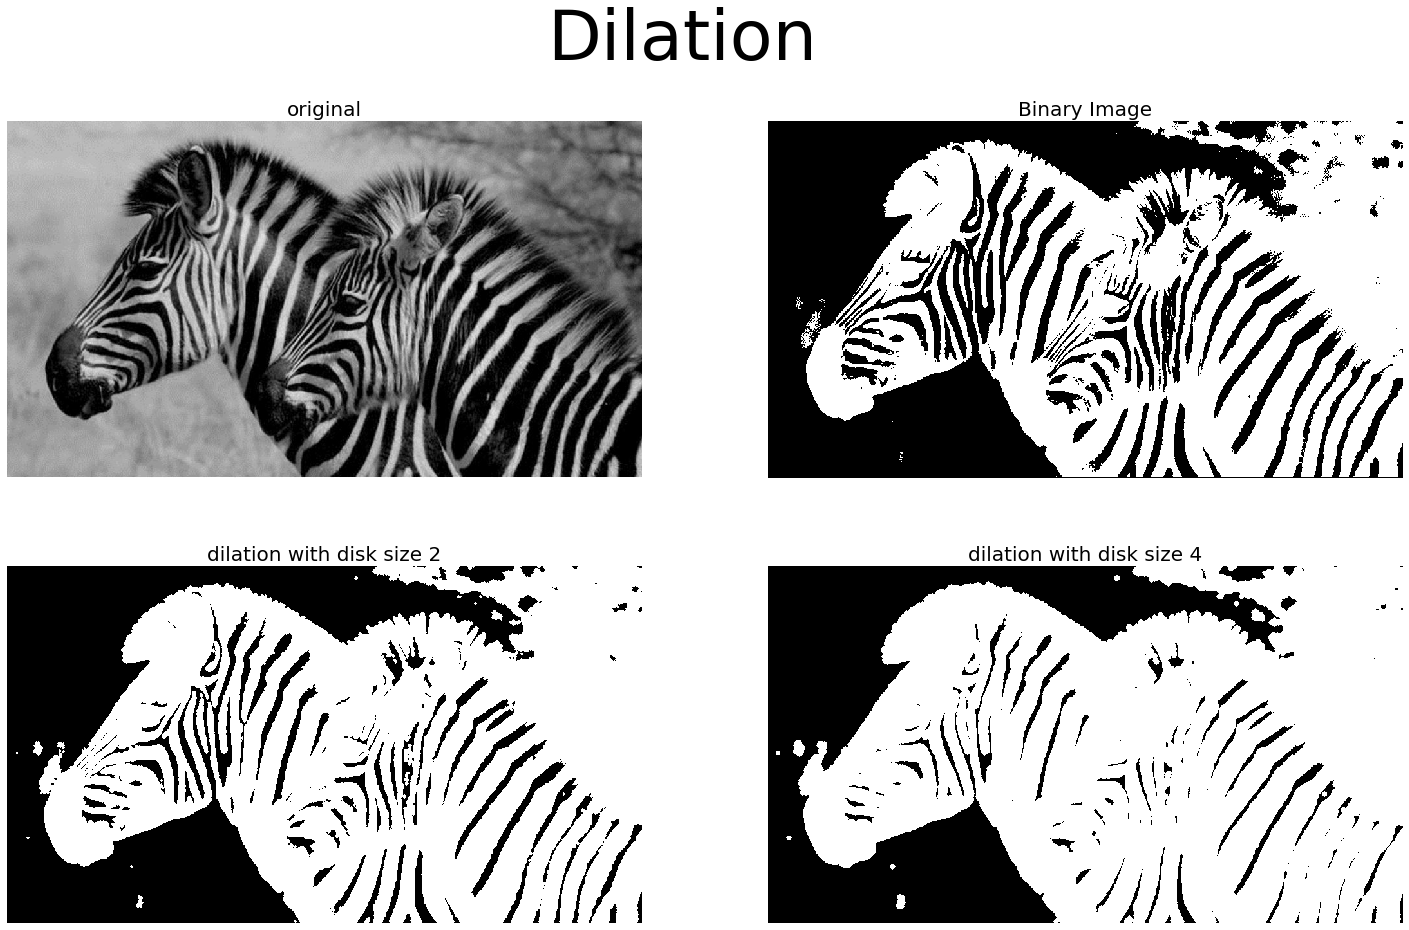

In [60]:
from skimage.morphology import binary_dilation, disk
from skimage import img_as_float

im = img_as_float(imread('images/z1.jpg'))
imBinary = im
# Binary image process
imBinary = 1 - imBinary[...,2]
imBinary[imBinary <= 0.5] = 0
imBinary[imBinary > 0.5] = 1

pylab.gray()
pylab.figure(figsize=(25,15))

pylab.subplot(221), plot_image(im, 'original') 
pylab.subplot(222), plot_image(imBinary, 'Binary Image') 
for d in range(1,3):
    pylab.subplot(2,2,d+2)
    
    im1 = binary_dilation(imBinary, disk(2*d))  # Dilation perfome
    
    plot_image(im1, 'dilation with disk size ' + str(2*d)) 

pylab.suptitle("Dilation", size = 70)
pylab.show()    

-----
# 3 - Extracting the boundary
----

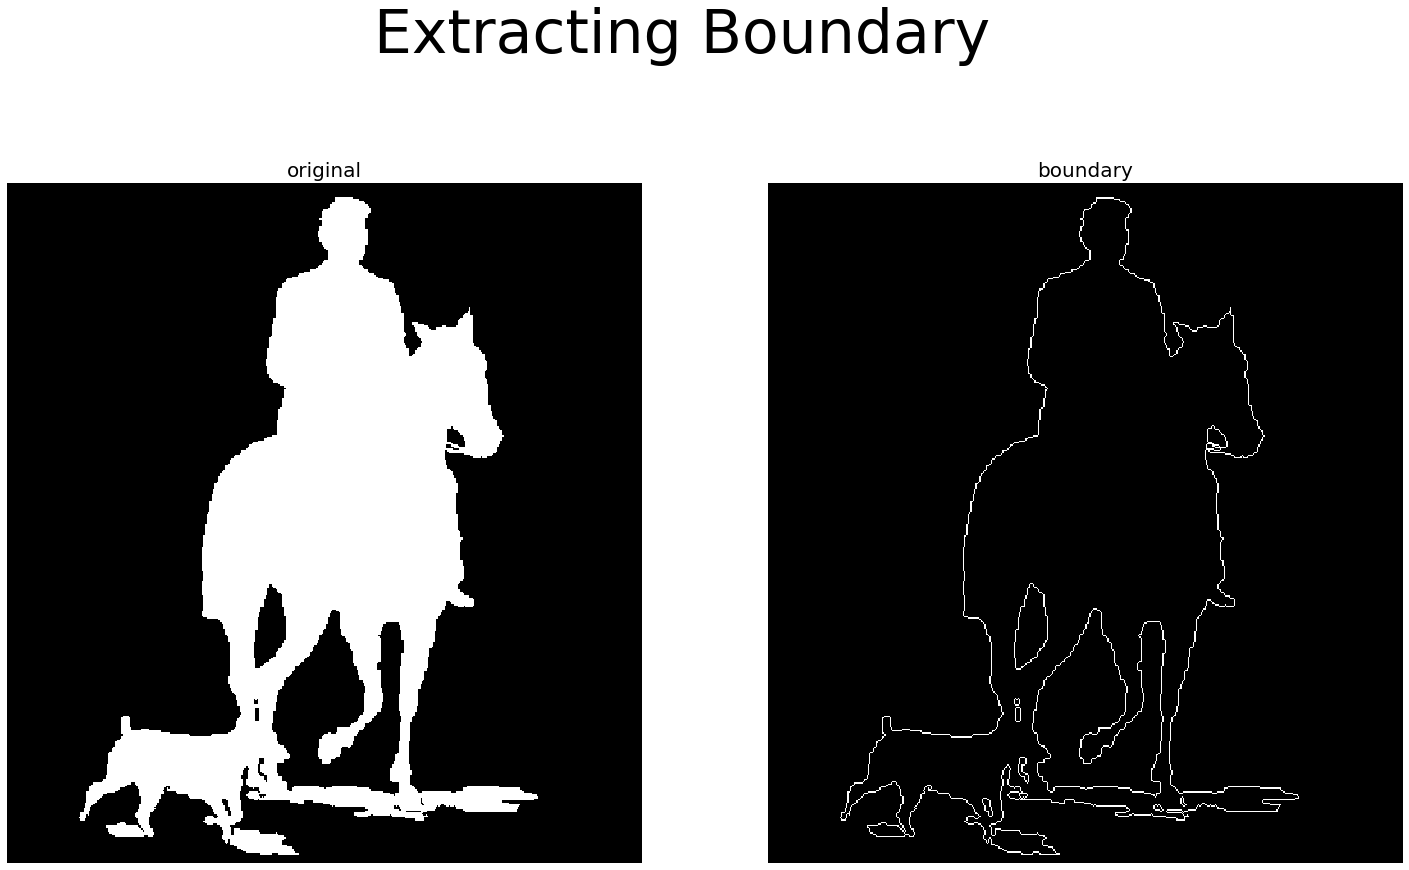

In [12]:
from skimage.morphology import binary_erosion

img = rgb2gray(imread('images/hd1.jpg'))
threshold = 0.5

imBinary = img
imBinary[imBinary < threshold] = 0
imBinary[imBinary >= threshold] = 1

boundary = imBinary - binary_erosion(imBinary)


pylab.figure(figsize=(25,15))
pylab.gray()

pylab.subplot(121), plot_image(img, 'original') 
pylab.subplot(122), plot_image(boundary, 'boundary') 

pylab.suptitle("Extracting Boundary", size = 60)
pylab.show()   

---------
# 4 - Computing the local entropy
-----------

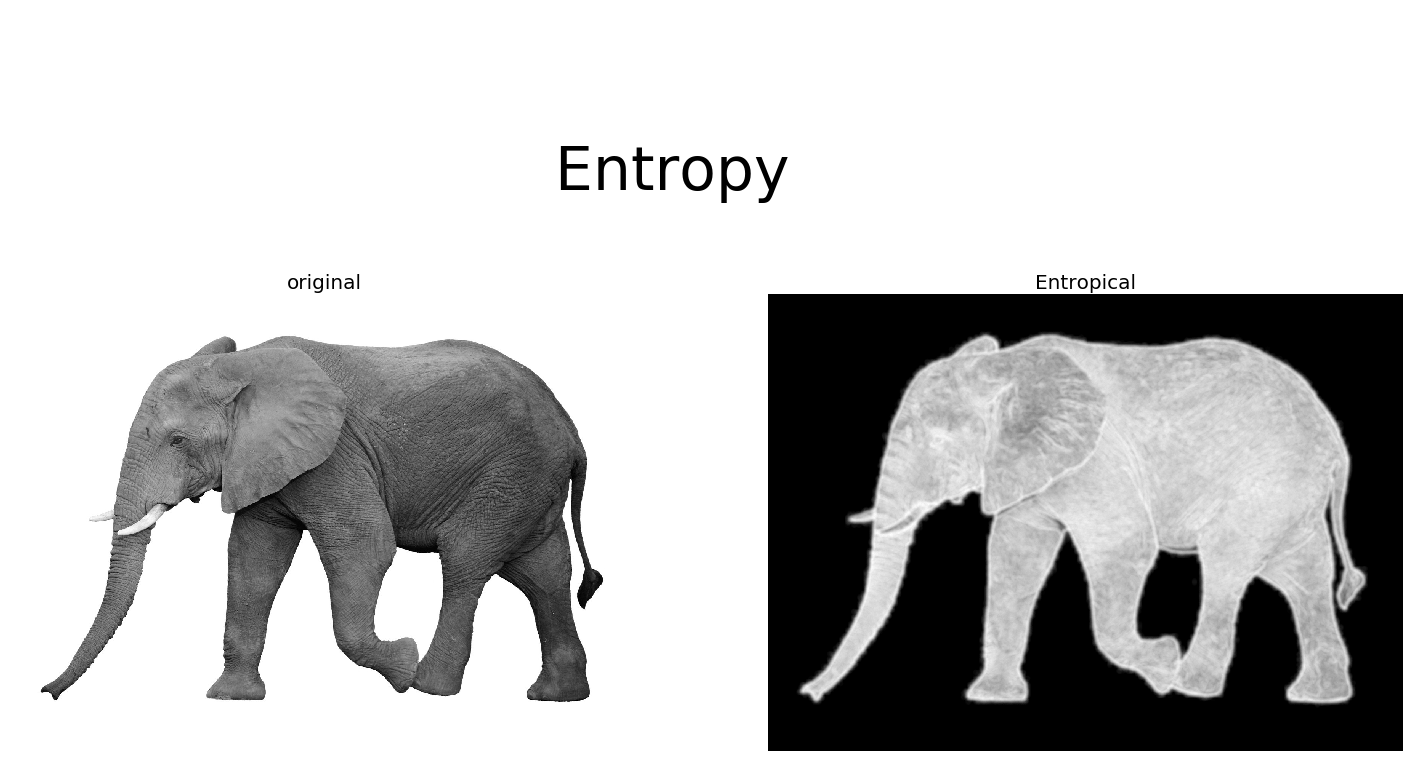

In [11]:
from skimage.morphology import disk
from skimage.filters.rank import entropy

img = rgb2gray(imread('images/e1.jpg'))

pylab.figure(figsize=(25,15))
pylab.gray()

pylab.subplot(121), plot_image(img, 'original') 
pylab.subplot(122), plot_image(entropy(img, disk(7)), 'Entropical') 

pylab.suptitle("\n\nEntropy ", size = 60)
pylab.show()

# Further Experiments


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.draw import disk
from skimage.morphology import erosion, dilation, closing, opening, area_closing, area_opening
from skimage.color import rgb2gray

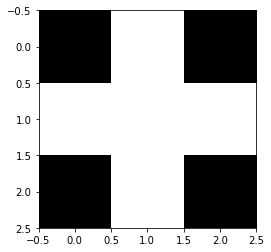

In [2]:
element = np.array([[0,1,0],
                    [1,1,1],
                    [0,1,0]])
plt.imshow(element, cmap='gray');

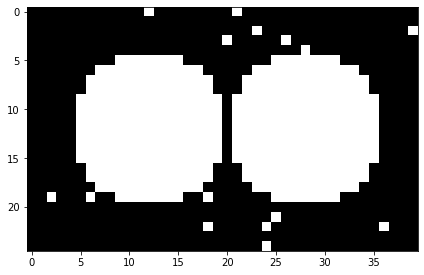

In [3]:
circle_image = np.zeros((25, 40))
circle_image[disk((12, 12), 8)] = 1
circle_image[disk((12, 28), 8)] = 1
for x in range(20):
    circle_image[np.random.randint(25), np.random.randint(40)] = 1
imshow(circle_image);

Text(0.5, 1.0, 'Dilated Image')

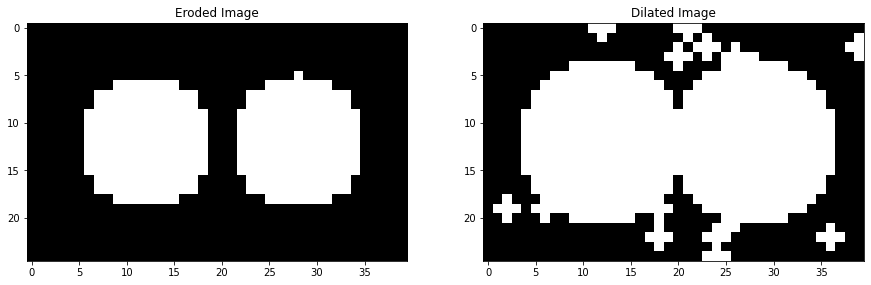

In [5]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].imshow(erosion(circle_image, element), cmap='gray');
ax[0].set_title('Eroded Image')
ax[1].imshow(dilation(circle_image, element), cmap='gray')
ax[1].set_title('Dilated Image')

Text(0.5, 1.0, 'Multi-Dilated Image')

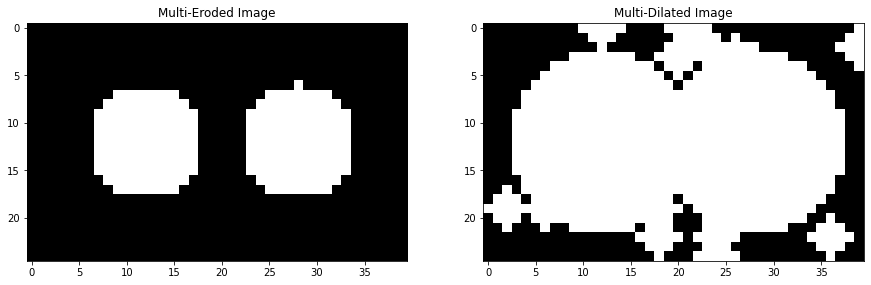

In [6]:
def multi_dil(im, num, element=element):
    for i in range(num):
        im = dilation(im, element)
    return im
def multi_ero(im, num, element=element):
    for i in range(num):
        im = erosion(im, element)
    return im
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].imshow(multi_ero(circle_image, 2, element), cmap='gray')
ax[0].set_title('Multi-Eroded Image')
ax[1].imshow(multi_dil(circle_image, 2, element), cmap='gray')
ax[1].set_title('Multi-Dilated Image')

Text(0.5, 1.0, 'Closed Image')

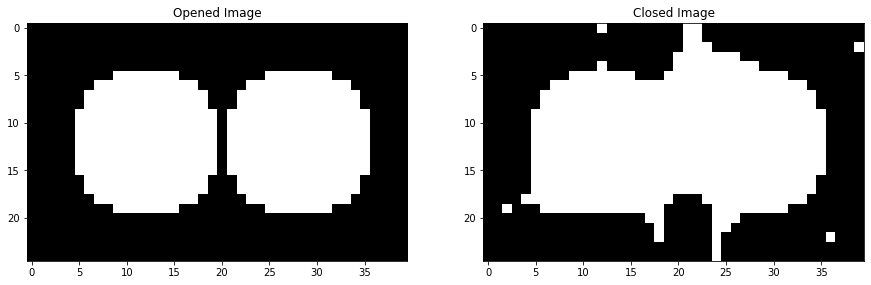

In [13]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].imshow(opening(circle_image, element), cmap='gray');
ax[0].set_title('Opened Image')
ax[1].imshow(closing(circle_image, element), cmap='gray')
ax[1].set_title('Closed Image')


Text(0.5, 1.0, 'Binarized Image')

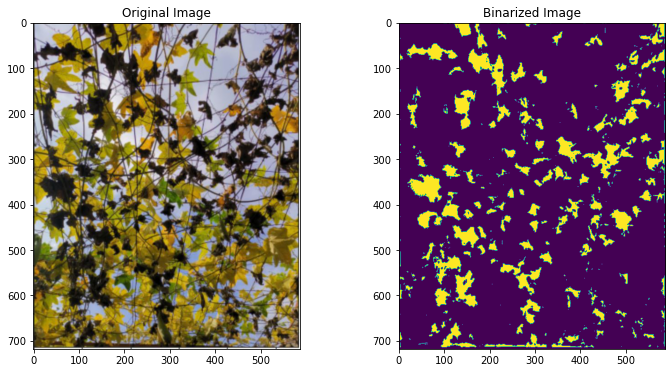

In [7]:
leaves = imread('images/leaves.jpg')
fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].imshow(leaves);
ax[0].set_title('Original Image')
binary = rgb2gray(leaves)<0.15
ax[1].imshow(binary)
ax[1].set_title('Binarized Image')

In [8]:
element = np.array([[0,0,0,0,0,0,0],
                    [0,0,1,1,1,0,0],
                    [0,1,1,1,1,1,0],
                    [0,1,1,1,1,1,0],
                    [0,1,1,1,1,1,0],
                    [0,0,1,1,1,0,0],
                    [0,0,0,0,0,0,0]])

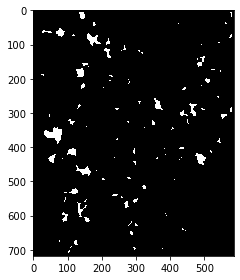

In [9]:
multi_eroded = multi_ero(binary, 2, element)
imshow(multi_eroded)

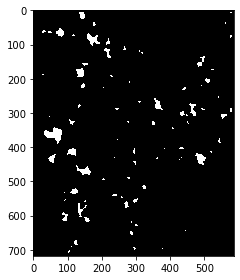

In [10]:
opened = opening(multi_eroded)
imshow(opened)

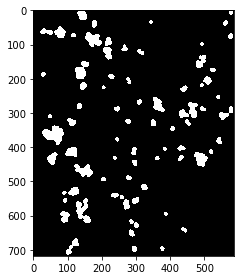

In [11]:
multi_diluted = multi_dil(opened, 2, element)
imshow(multi_diluted)

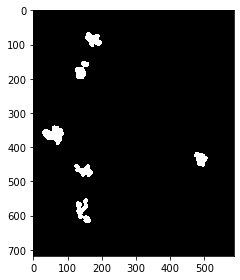

In [12]:
area_morphed = area_opening(area_closing(multi_diluted, 1000), 1000)
imshow(area_morphed)